In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup


# Set the path to your WebDriver executable
driver_path = '/Users/harthiksmacbookair/Documents/Wed Data Analytics/Fall 2023 MGMT 590 - Web Data Analytics - Merge - 8212023 - 851 AM/chrome-mac-arm64/Google Chrome for Testing.app'

# Initialize the WebDriver (e.g., Chrome)
options = webdriver.ChromeOptions()
options.binary_location = driver_path  # Set the binary location

# Initialize the WebDriver with the options
driver = webdriver.Chrome(options=options)

# firefox_options = Options()
# driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()), options=firefox_options)

# Navigate to the website
url = "https://www.amazon.com/Best-Sellers-Clothing-Shoes-Jewelry-Mens-T-Shirts/zgbs/fashion/1045624/ref=zg_bs_pg_1_fashion?_encoding=UTF8&pg=1"
driver.get(url)

# Initialize empty lists outside the loop
rank = []
product_name = []
average_rating = []
review_count = []
price = []


# Loop to scrape all quotes
while True :
    # Wait for the page to load
    wait = WebDriverWait(driver, 60)
    wait.until(EC.presence_of_element_located((By.ID, "p13n-asin-index-0")))

    for j in range(10):
        #Scroll 1000 pixels at once and wait for 5 secs for all the information to load
        driver.execute_script("window.scrollBy(0, 1000);")
        time.sleep(20)  # Adjust the sleep time as needed

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    product_elements = soup.find_all('div',attrs={'class': 'a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc'})
    
    for product in product_elements:
        
        # Extract product details and append to respective lists
        ranking = product.find('span', attrs={'class': 'zg-bdg-text'})
        rank.append(ranking.get_text() if ranking else '')
        
        item = product.find('div', attrs={'class': '_cDEzb_p13n-sc-css-line-clamp-3_g3dy1'})
        product_name.append(item.get_text() if item else '')
        
        rating = product.find('span', attrs={'class': 'a-icon-alt'})
        average_rating.append(rating.get_text() if rating else '')
        
        review = product.find('span', attrs={'class': 'a-size-small'})
        review_count.append(review.get_text() if review else '')
        
        cost = product.find('span', attrs={'class': '_cDEzb_p13n-sc-price_3mJ9Z'})
        price.append(cost.get_text() if cost else '$0')
    
    try:
        next_button = driver.find_element(By.PARTIAL_LINK_TEXT, "Next page")
        next_button.click()
    
    except Exception as e:
        break

# Close the WebDriver
driver.quit()

print(product_name)
print(rank)
print(average_rating)
print(review_count)
print(price)



["Gildan Men's Crew T-Shirts, Multipack, Style G1100", 'Gildan Adult Ultra Cotton T-shirt, Style G2000, Multipack', 'Gildan Ultra Cotton Long Sleeve T-Shirt, Style G2400, Multipack', "Hanes Essentials Men's T-Shirt Pack, Men's Short Sleeve Tees, Crewneck Cotton T-Shirts for Men, Value Pack", "Russell Athletic Men's Dri-Power Cotton Blend Tees & Tanks, Moisture Wicking, Odor Protection, UPF 30+, Sizes S-4X", "Gildan Men's Heavy Cotton T-Shirt, Style G5000, Multipack", "Gildan Men's Softstyle Cotton T-Shirt, Style G64000, Multipack", "Comfort Colors Men's Short Sleeve Tee, Style 1717", "Gildan Men's V-Neck T-Shirts, Multipack, Style G1103", "Hanes Men's T-Shirts, X-Temp Men's Performance T-Shirt Pack, Moisture-Wicking T-Shirts, Cotton Blend Tees, 2-Pack", 'INTO THE AM Mens T Shirt - Short Sleeve Crew Neck Soft Fitted Tees S - 4XL Fresh Classic Tshirts', "Dickies Men's Heavyweight Crew Neck Short Sleeve Tee", "Jerzees Men's Dri-Power Cotton Blend Long Sleeve Tees, Moisture Wicking, Odor P

In [49]:
import pandas as pd
import re  # Import the regular expressions library


# print(len(product_name))
# print(len(rank))
# print(len(average_rating))
# print(len(review_count))
# print(len(price))


# # Create a list to store cleaned average ratings
cleaned_average_ratings = []

# Loop through the average_rating list and extract the numerical value
for rating in average_rating:
    # Use regular expressions to extract the numerical part (e.g., "4.6")
    match = re.search(r'(\d+\.\d+)', rating)
    if match:
        cleaned_average_ratings.append(float(match.group(0)))
    else:
        cleaned_average_ratings.append(None)  # Handle cases where no rating was found


# Create a dictionary with the scraped data
data = {
    'Rank': rank,
    'Product Name': product_name,
    'Average Rating': cleaned_average_ratings,
    'Review Count': review_count,
    'Price': price
}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Remove '$' and any non-numeric characters from the "Price" column
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Remove any non-numeric characters from the "Rank" and "Review Count" columns
df['Rank'] = df['Rank'].str.replace('[^\d]', '', regex=True)
df['Review Count'] = df['Review Count'].str.replace('[^\d]', '', regex=True)

# Replace empty strings with '0' in the "Rank" and "Review Count" columns
df['Rank'].replace('', '0', inplace=True)
df['Review Count'].replace('', '0', inplace=True)


# Convert "Rank" and "Review Count" to integers
df['Rank'] = df['Rank'].astype(int)
df['Review Count'] = df['Review Count'].astype(int)


# Print the first few rows of the DataFrame
print(df.dtypes)



Rank                int64
Product Name       object
Average Rating    float64
Review Count        int64
Price             float64
dtype: object


In [50]:
# Print the first few rows of the DataFrame
print(df.head())

# Assuming 'df' is your DataFrame
df.to_csv('amazon_best_Sellers.csv', index=False)

   Rank                                       Product Name  Average Rating  \
0     1  Gildan Men's Crew T-Shirts, Multipack, Style G...             4.6   
1     2  Gildan Adult Ultra Cotton T-shirt, Style G2000...             4.5   
2     3  Gildan Ultra Cotton Long Sleeve T-Shirt, Style...             4.5   
3     4  Hanes Essentials Men's T-Shirt Pack, Men's Sho...             4.4   
4     5  Russell Athletic Men's Dri-Power Cotton Blend ...             4.4   

   Review Count  Price  
0        270102  15.97  
1        119001  11.45  
2        135500  11.82  
3        115651  14.99  
4         64600   8.97  


/var/folders/l_/lcz13d_x6n121m_hrpjhrksw0000gn/T/ipykernel_12435/3020872400.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->correlation matrix


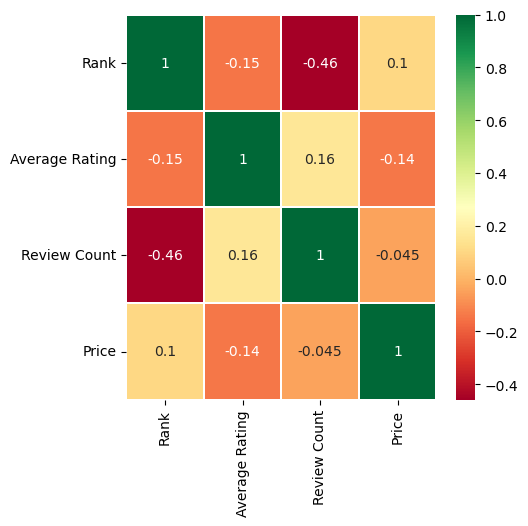

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Understanding correlation between the variables
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



In [52]:
# df = df.drop(columns=['Product Name'])

print(df.dtypes)

for col in ['Average Rating', 'Review Count', 'Price']:
    if df[col].isnull().any() or np.isinf(df[col]).any():
        df[col].fillna(df[col].mean(), inplace=True)  # Replace NaN with mean
        df = df[np.isfinite(df[col])]  # Remove rows with inf values


df['log_rank'] = np.log(df['Rank']+1)
df['log_price'] = np.log(df['Price']+1 )

df = df.drop(columns=['Rank','Price'])

#Construct a linear regression model with the selected features against the target variable and get the insights like r squared and coefficients values

X = df[['Average Rating', 'Review Count', 'log_price']]
y = df['log_rank']


# Check for missing and infinite values in X
missing_values = X.isnull().sum()
infinite_values = X.isin([np.inf, -np.inf]).sum()

# Handle missing values (replace with mean or drop rows)
X.fillna(X.mean(), inplace=True)  # You can replace missing values with the mean
X.dropna(inplace=True)  # Drop rows with missing values

# Handle infinite values (replace with a finite value or drop rows)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Fit the OLS (Ordinary Least Squares) linear regression model
X1 = sm.add_constant(X)  # Adding a constant (intercept) to the model
model1 = sm.OLS(y, X1).fit()
print(model1.summary())


Rank                int64
Product Name       object
Average Rating    float64
Review Count        int64
Price             float64
dtype: object
                            OLS Regression Results                            
Dep. Variable:               log_rank   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     30.47
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           6.29e-14
Time:                        04:07:12   Log-Likelihood:                -92.556
No. Observations:                 100   AIC:                             193.1
Df Residuals:                      96   BIC:                             203.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0

/var/folders/l_/lcz13d_x6n121m_hrpjhrksw0000gn/T/ipykernel_12435/99667410.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # You can replace missing values with the mean
/var/folders/l_/lcz13d_x6n121m_hrpjhrksw0000gn/T/ipykernel_12435/99667410.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)  # Drop rows with missing values
/var/folders/l_/lcz13d_x6n121m_hrpjhrksw0000gn/T/ipykernel_12435/99667410.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t